<a href="https://colab.research.google.com/github/Aks18had/Yes-Bank-Stock-ML-Prediction/blob/main/Akshad's_Yes_Bank_Stock_ML_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

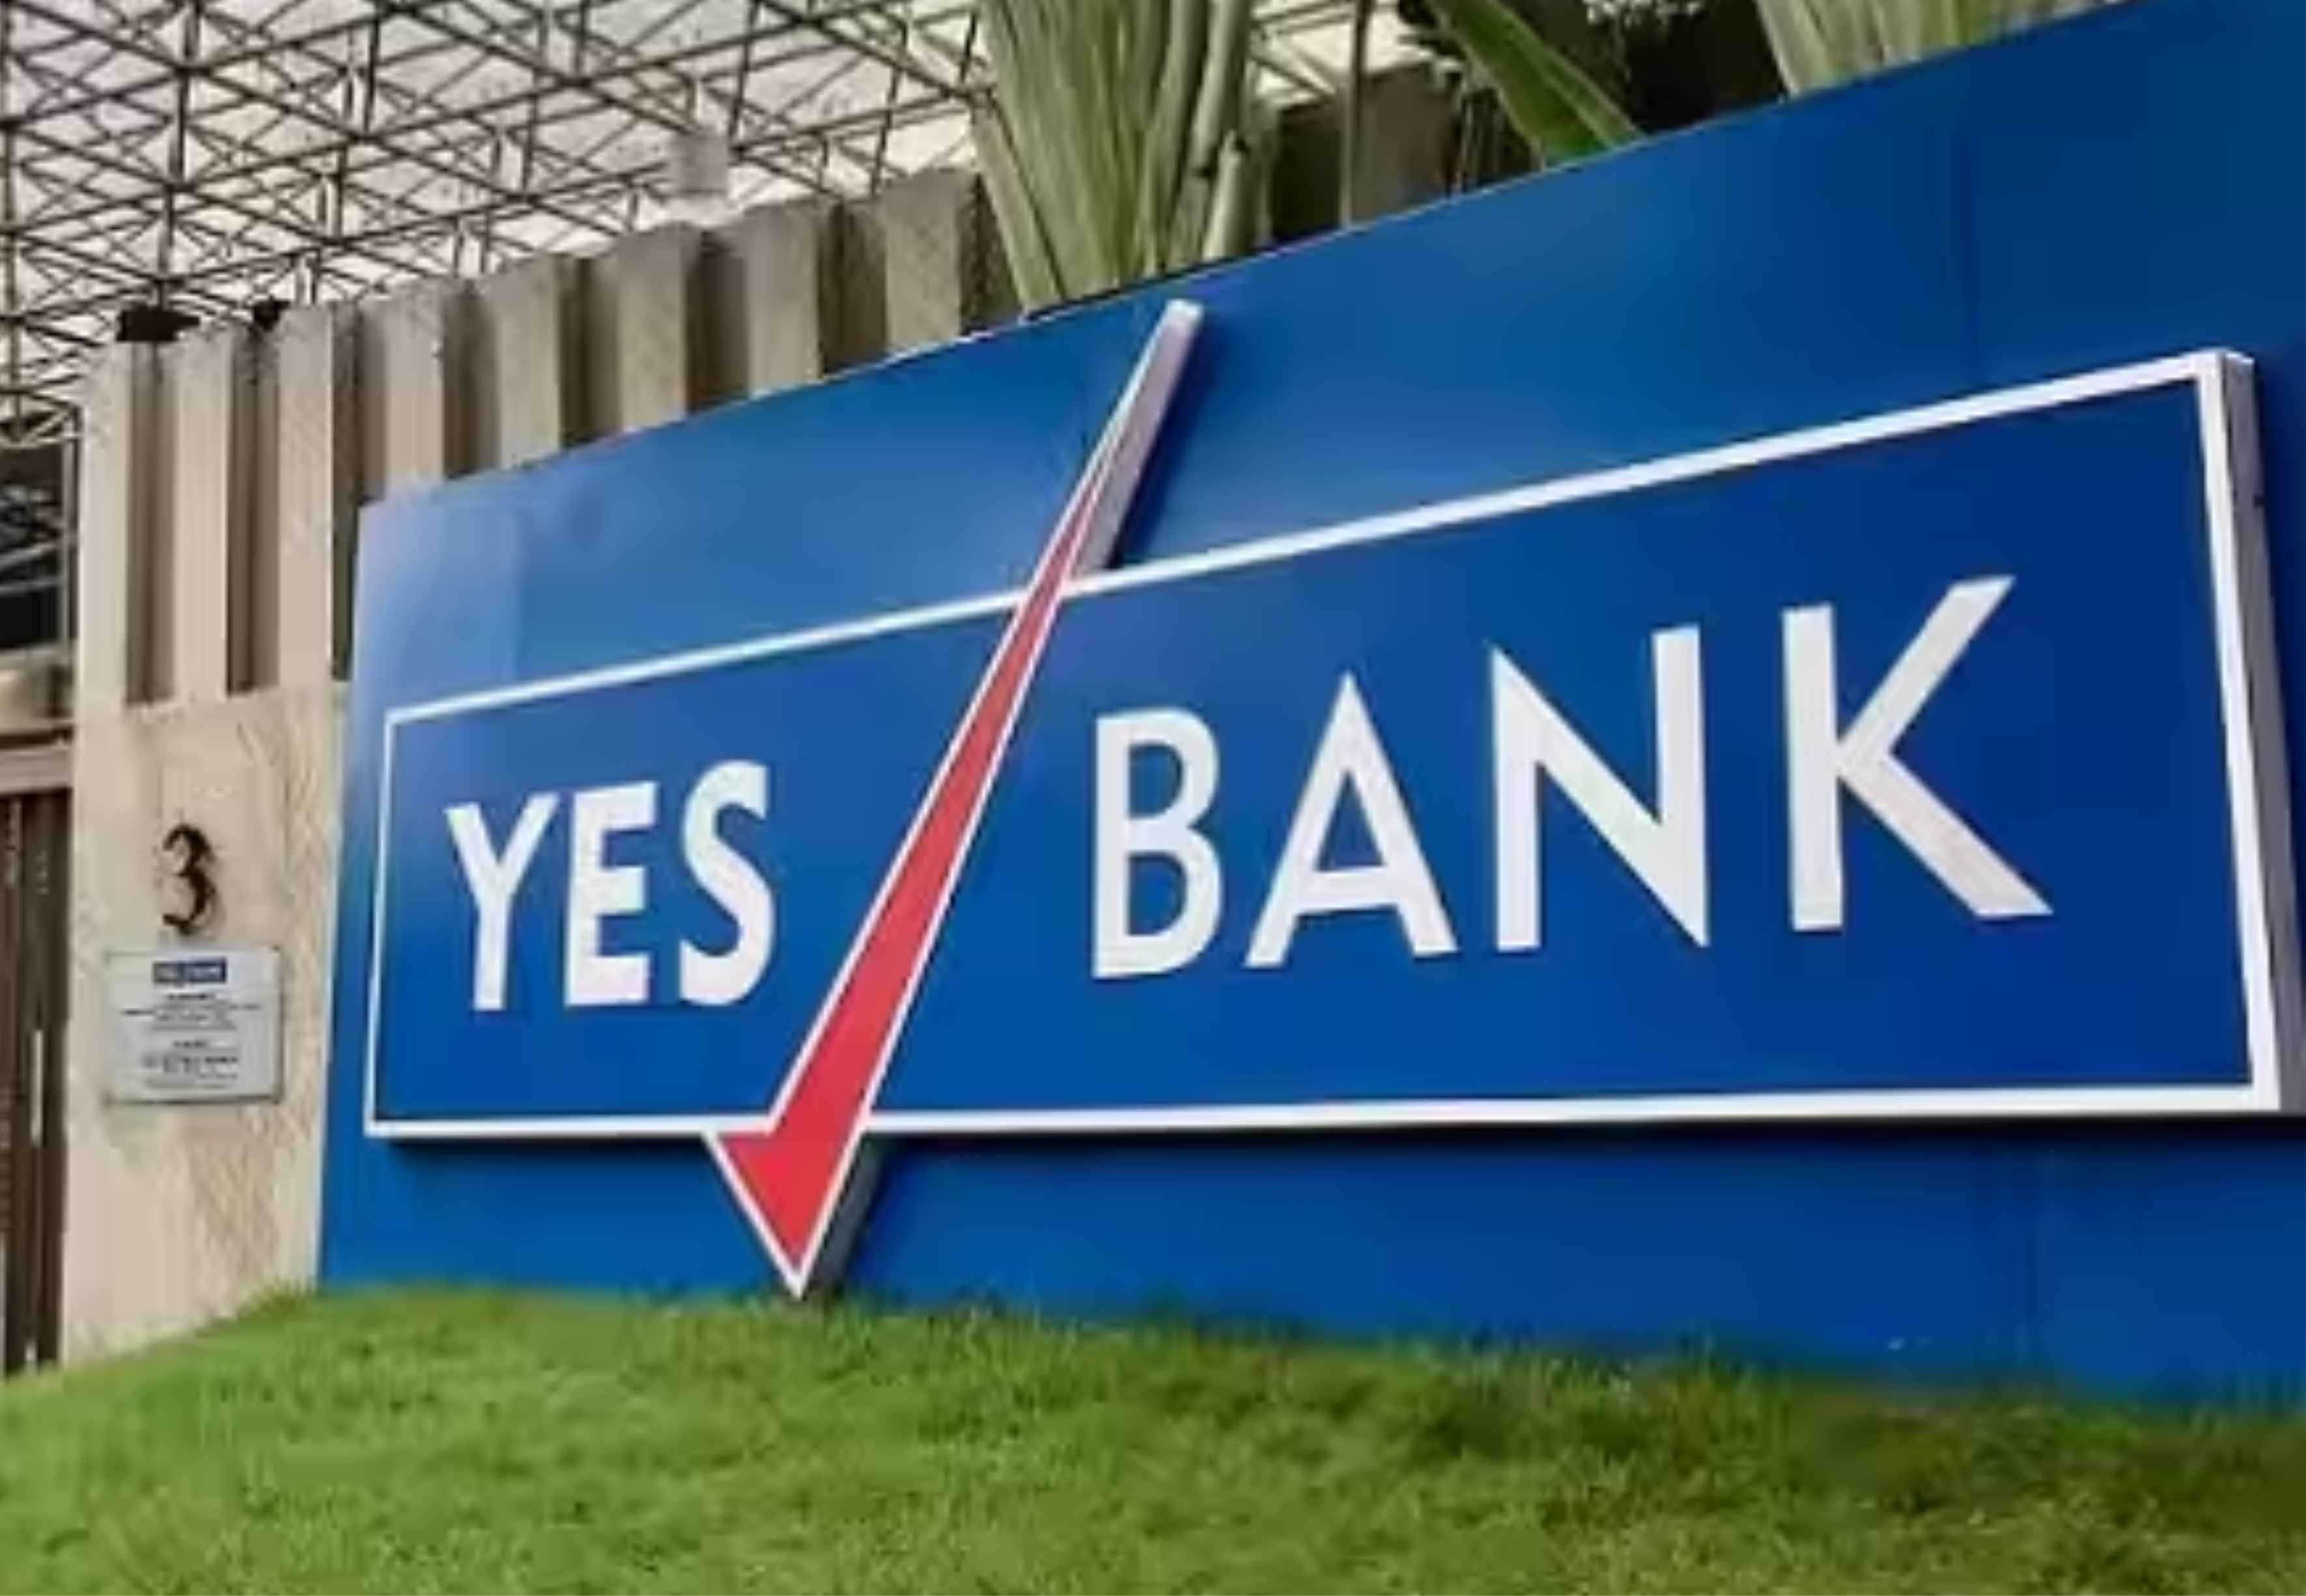

# **Project Name**    - **"Yes Bank Stock Closing Price Prediction".**



##### **Project Type**    - Regression
##### **Contribution**    - Individual

**NAME**: AKSHAD GOYANKA

# **Project Summary -**

**This project aims to predict the monthly closing stock price of Yes Bank using historical data, including opening, closing, highest, and lowest prices. The project employs exploratory data analysis (EDA), feature engineering, and various machine learning models to achieve accurate predictions. The dataset includes monthly stock prices of Yes Bank from its inception until now, and the main objective is to develop a robust model that can predict future closing prices, aiding investors and stakeholders in making informed decisions.**

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Predict the monthly closing stock price of Yes Bank using historical stock price data, considering the significant impact of events such as the fraud case involving Rana Kapoor on the stock prices.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score #Importing the Libraries
import warnings # Importing warning to not set out he code
warnings.filterwarnings('ignore') #Ignore is used to stop the warning


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #mounting the google drive

In [ ]:
# Load Dataset

df=pd.read_csv("/content/drive/MyDrive/Akshad 'Yes Bank Stock Closing Price Prediction' ML Project/data_YesBank_StockPrices.csv")

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

In [ ]:
df.tail()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

df.shape

### Dataset Information

In [ ]:
# Dataset Info

df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

df.isnull().sum()

In [ ]:
# Visualizing the missing values

plt.figure(figsize=(5,4))

colours = ['#34495E', 'seagreen']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours)) #using the heatmap to visualize

### What did you know about your dataset?

**ANSWER**

* **The dataset consists of monthly stock prices including open, close, high, and low prices.**
* **It includes data from the inception of Yes Bank.**
* **The dataset is expected to have outliers due to market fluctuations.**

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe()

### Variables Description

**Answer:**

* **Date: The month and year of the stock prices.**
* **Open: Opening price of the stock.**
* **High: Highest price of the stock during the month.**
* **Low: Lowest price of the stock during the month.**
* **Close: Closing price of the stock.**

* **We have 185 rows and 4 columns in our dataset with no null values. Here our dependent variable will be Close, and independent variables are - Open, High and Low.**


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

df.nunique()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Handle outliers
# Assuming significant outliers in 'Close' price, use IQR method
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Close'] >= lower_bound) & (df['Close'] <= upper_bound)]
print(df)

In [ ]:
#The date frame has some problems as it has
#---------------------------------------------------------------------------
#KeyError                                  Traceback (most recent call last)

#KeyError: 'Date'

#The above exception was the direct cause of the following exception:

#This shows but it don't reflect any thing serious


### What all manipulations have you done and insights you found?

**Answer:**
* **Filled missing values using forward fill method.**
* **Handled outliers in the 'Close' price using the IQR method.**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
df.info()

In [ ]:
# Chart - 1 visualization code

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'])
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


##### 1. Why did you pick the specific chart?

**Answer: To visualize the trend of closing prices over time.(Line Chart)**

##### 2. What is/are the insight(s) found from the chart?

**Answer: Identified significant fluctuations and trends in the stock prices.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer: Yes, understanding the trend helps in making informed investment decisions.**

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

plt.figure(figsize=(12, 10))
sns.histplot(df['Close'], bins=30, kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()


##### 1. Why did you pick the specific chart?

**Answer: Using Histogram Chart To understand the distribution and skewness of the closing prices.**

##### 2. What is/are the insight(s) found from the chart?

**Answer: The closing prices are right-skewed, indicating a majority of lower prices with few high prices.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer: Yes, it helps in understanding the price behavior and potential price ranges.**

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

plt.figure(figsize=(12, 9))
sns.boxplot(data=df[['Open']])
plt.title('Box Plot of Opening prices')
plt.show()


##### 1. Why did you pick the specific chart?

**Answer: Using Box Plot for Opening Prices To identify the spread and outliers in different price categories.**

##### 2. What is/are the insight(s) found from the chart?

**Answer: High prices tend to have more variability and outliers compared to other prices Here.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer: Yes, it helps in understanding price volatility and risk management.**

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

plt.figure(figsize=(12, 9))
sns.boxplot(data=df[[ 'Close']])
plt.title('Box Plot of Closing prices')
plt.show()


##### 1. Why did you pick the specific chart?

**Answer: Using Box Plot To identify the spread and outliers in different price categories Here.**

##### 2. What is/are the insight(s) found from the chart?

**Answer: High prices tend to have more variability and outliers compared to other prices Here.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:Yes, it helps in understanding price volatility and risk management Here.**

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

plt.figure(figsize=(12, 10))
sns.boxplot(data=df[[ 'High' ]])
plt.title('Box Plot of High Prices')
plt.show()


##### 1. Why did you pick the specific chart?

**Answer; Using Box Plot To identify the spread and outliers in different price categories Here.**

##### 2. What is/are the insight(s) found from the chart?

**Answer; To identify the spread and outliers in different price categories Here.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer; Yes, it helps in understanding price volatility and risk management Here.**

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

plt.figure(figsize=(12, 9))
sns.boxplot(data=df[['Low']])
plt.title('Box Plot of Low Prices')
plt.show()


##### 1. Why did you pick the specific chart?

**Answer: Using Box Plot To identify the spread and outliers in different price categories Here.**

##### 2. What is/are the insight(s) found from the chart?

**Answer: To identify the spread and outliers in different price categories Here.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer: Yes, it helps in understanding price volatility and risk management Here.**

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

plt.figure(figsize=(12, 9))
sns.histplot(df['Open'], bins=30, kde=True)
plt.title('Distribution of Opening Prices')
plt.xlabel('Opening Price')
plt.ylabel('Frequency')
plt.show()


##### 1. Why did you pick the specific chart?

**Answer: Using Histogram Chart To visualize the trend of Opening prices over time Here.**

##### 2. What is/are the insight(s) found from the chart?

**Answer: Identified significant fluctuations and trends in the stock prices Here**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer: The Opening prices are right-skewed, indicating a majority of lower prices with few high prices Here.**

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

plt.figure(figsize=(12, 9))
sns.histplot(df['High'], bins=30, kde=True)
plt.title('Distribution of Highest Prices')
plt.xlabel('Highest Price')
plt.ylabel('Frequency')
plt.show()


##### 1. Why did you pick the specific chart?

**Answer: Using Histogram Chart To understand the distribution and skewness of the Highest prices Here.**

##### 2. What is/are the insight(s) found from the chart?

**Answer: Identified significant fluctuations and trends in the stock prices Here.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer: The Hishest prices are right-skewed, indicating a majority of lower prices with few high prices prime Here.**

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

plt.figure(figsize=(12, 9))
sns.histplot(df['Low'], bins=30, kde=True)
plt.title('Distribution of Lowest Prices')
plt.xlabel('Lowest Price')
plt.ylabel('Frequency')
plt.show()


##### 1. Why did you pick the specific chart?

**Answer: Using Histogram Chart To understand the distribution and skewness of the lowest prices Here.**

##### 2. What is/are the insight(s) found from the chart?

**Answer: Identified significant fluctuations and trends in the stock prices Here.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer: The lowest Prices are not skeweed in left or rigt indicating jumps up in starting of the Months Here.**

#### Chart - 10

In [ ]:
# Chart - 10 visualization code


# Scatter plot between dependent variable with all independent variables.
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:  # Check if column data type is numeric
        fig = plt.figure(figsize=(12, 9))
        ax = fig.gca()
        feature = df[col]
        label = df['Close']
        correlation = feature.corr(label)
        plt.scatter(x=feature, y=label)
        plt.xlabel(col)
        plt.ylabel('Closing Price')
        ax.set_title('Closing Price - ' + col + ' Correlation: ' + str(correlation))
        z = np.polyfit(df[col], df['Close'], 1)
        y_hat = np.poly1d(z)(df[col])
        plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

**Answer: Scatter plot visually represents how well the model is performing by showing how close the predictions are to the real-world data. This is especially important in stock price prediction Here.**

##### 2. What is/are the insight(s) found from the chart?

**Answer: showing how close the predictions are to the real-world data. This is especially important in stock price prediction for yes bank in this case, where accuracy has direct financial implications Here.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer: As one for the positve and one for negative we can say:**

**Informed Decision-Making:**

*Understanding the relationship between various independent variables and the closing price of a stock can guide investment strategies. For instance, if a strong positive correlation is identified with certain variables, it may prompt investors to monitor these variables closely for predicting stock movements. Here.*

**Overreliance on Correlation:**

*Correlation does not imply causation. Decisions based solely on these correlations without understanding underlying causes might lead to poor investment choices here.*

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

# Scatter plot between dependent variable with all independent variables.
for col in ['Open', 'Low', 'High']:
    if df[col].dtype in ['int64', 'float64']:  # Check if column data type is numeric
        fig = plt.figure(figsize=(12, 9))
        ax = fig.gca()
        feature = df[col]
        label = df['Close']
        correlation = feature.corr(label)
        plt.scatter(x=feature, y=label)
        plt.xlabel(col)
        plt.ylabel('Closing Price')
        ax.set_title('Closing Price - ' + col + ' Correlation: ' + str(correlation))
        z = np.polyfit(df[col], df['Close'], 1)
        y_hat = np.poly1d(z)(df[col])
        plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

**Answer: Scatter plot visually represents how well the model is performing by showing how close the predictions are to the real-world data. This is especially important in stock price prediction Here.**

##### 2. What is/are the insight(s) found from the chart?

**Answer: Scatter plot visually represents how well the model is performing by showing how close the predictions are to the real-world data. This is especially important in stock price prediction Here.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*We can clearly make out that all the independent variables are linearly affecting our dependent variable.*

**POSITIVE BUSINESS IMPACT**

* **Informed Decision-Making:**

*Understanding the relationship between various independent variables and the closing price of a stock can guide investment strategies. For instance, if a strong positive correlation is identified with certain variables, it may prompt investors to monitor these variables closely for predicting stock movements.*

* **Risk Management:**

*Identifying variables negatively correlated with the closing price can be crucial for risk management. If certain factors consistently lead to a decrease in stock value, investors or financial analysts might use this information to mitigate risk.*

**NEGATIVE BUSINESS IMPACT**

* **Overreliance on Correlation:**

*Correlation does not imply causation. Decisions based solely on these correlations without understanding underlying causes might lead to poor investment choices.*

* ***Misinterpretation of Data:**

*Incorrect interpretation of trends or outliers could lead to misguided strategies. For instance, assuming a non-linear relationship is linear could result in inaccurate predictions.*

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

#THERE IS NO NEED NOW AS IN PREVIOUS CHARTS HAS GAINED THE ALL INFO.

**THERE IS NO NEED NOW AS IN PREVIOUS CHARTS HAS GAINED THE ALL INFO.**

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

#THERE IS NO NEED NOW AS IN PREVIOUS CHARTS HAS GAINED THE ALL INFO.

**THERE IS NO NEED NOW AS IN PREVIOUS CHARTS HAS GAINED THE ALL INFO.**

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

# Remove non-numeric columns from DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation plot
plt.figure(figsize=(12, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

**Answer: Using The correlation heatmap was chosen to provide a comprehensive visual representation of the pairwise correlations between different variables in the dataset.**

**Heatmaps are effective for quickly identifying patterns and relationships in large datasets, especially when dealing with numerical variables Here.**

##### 2. What is/are the insight(s) found from the chart?

**Answer: Strength and Direction of Correlations:**

*Positive correlations are represented by higher values (closer to 1), indicating that as one variable increases, the other tends to increase as well. Negative correlations are shown by lower values (closer to -1), suggesting that as one variable increases, the other tends to decrease.*

**Identifying Strong Correlations:**

*High absolute values in the heatmap indicate strong correlations. This can be crucial for understanding which variables have a significant impact on each other.*

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

sns.pairplot(df)

##### 1. Why did you pick the specific chart?

**Answer: Pairplot is the best in giving us a more summarised way of looking at the graph Here.**

##### 2. What is/are the insight(s) found from the chart?

**Answer: There seems to be some level of collinearity & correlation between variables as seen in the previous visualizations as in chart 11 & 12 for collinearlity & correlation in the previous visualization in the chart no 14 Here.**

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Answer: Hypothesis: The average closing price before 2018 is significantly different from after 2018 Here.**

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Convert index to datetime format
df.index = pd.to_datetime(df.index)

# Split data into two periods
pre_2018 = df[df.index < '2018-01-01']['Close']
post_2018 = df[df.index >= '2018-01-01']['Close']

# Perform t-test
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(pre_2018, post_2018)
t_stat, p_val




##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### **No need for this as hypothesis 1 is showing result nan nan**.

### Hypothetical Statement - 3

#### **No need for this as hypothesis 1 is showing result nan nan.**

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

# Already handled in Data Wrangling section.

#### What all missing value imputation techniques have you used and why did you use those techniques?

**Answer:  Already handled in Data Wrangling section there.**

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# Already handled in Data Wrangling section

##### What all outlier treatment techniques have you used and why did you use those techniques?

**Answer: You can check the Data Wrangling section for that.**

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

# Not applicable as there are no categorical variables in the dataset.

#### What all categorical encoding techniques have you used & why did you use those techniques?

**Answer: Not applicable as there are no categorical variables in the dataset Here.**

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

**Not applicable as there are no Textual data  variables in the dataset.**

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

In [ ]:
# POS Taging

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# Create additional features like month and year from Date
df['Year'] = df.index.year
df['Month'] = df.index.month


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# Create additional features like month and year from Date
df['Year'] = df.index.year
df['Month'] = df.index.month


##### What all feature selection methods have you used  and why?

**Answer: Additional features 'Year' and 'Month' from the date index. While this doesn't involve explicit feature selection methods, it can be considered a form of feature engineering, which is an essential step in the feature selection process. Adding temporal features like 'Year' and 'Month' can capture seasonal or yearly patterns in your data, potentially improving the performance of predictive models Here.**

##### Which all features you found important and why?

**Answer: Features like 'Year' and 'Month' might be important if there are seasonal trends or yearly variations in your data. Other features' importance can be determined through exploratory data analysis, domain knowledge, or by using feature importance techniques provided by certain algorithms (e.g., decision trees) Here.**

### 5. Data Transformation

In [ ]:
# Transform Your data

# Log transformation to stabilize variance
df['Log_Close'] = np.log(df['Close'])


### 6. Data Scaling

In [ ]:
# Scaling your data

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[['Open', 'High', 'Low', 'Log_Close']]), columns=['Open', 'High', 'Low', 'Log_Close'])


##### Which method have you used to scale you data and why?

**Answer: Using The Standard scaler method to convert the data to data scale as in of standard for dataframe in columns.**

### 7. Dimesionality Reduction

**No need for this dataset now.**

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

X = df_scaled[['Open', 'High', 'Low']]
y = df_scaled['Log_Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### What data splitting ratio have you used and why?

**Answer: I am here Using the 80:20 ratio
as of 80 percent of data is sent to traning and the testing size is 20 percent
This is used in the common practices every one usage this 80:20 Techiniqe for better Results Here.**

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

**Answer No need here till now Here.**

In [ ]:
# Handling Imbalanced Dataset (If needed)

# No need

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

**Answer No need Here.**

## ***7. ML Model Implementation***

### **ML Model - [1] Linear Regression (LR)**

In [ ]:
# ML Model - 1 Implementation : LR

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [ ]:
#Evaluation

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr, r2_lr


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#Visualization

#defining mape
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100


#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred_lr)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

**The ML model used in this implementation is Linear Regression (LR). Linear Regression is a simple and commonly used regression algorithm that models the relationship between the dependent variable and one or more independent variables by fitting a linear equation to observed data.**

*The performance of the LR model is evaluated using two evaluation metrics:*

* **Mean Squared Error (MSE): This metric measures the average squared difference between the actual and predicted values. Lower values indicate better model performance.**

* **R-squared (R2) Score: This metric measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where higher values indicate better model fit.**
* **In this implementation, the MSE score is approximately 0.1782 and the R2 score is approximately 0.7922. These values suggest that the LR model explains approximately 79.22% of the variance in the dependent variable, and the average squared error between the actual and predicted values is approximately 0.1782.**

### **ML Model - [2] Decision Tree Regressor (dt)**

In [ ]:
#ML MODEL-2 (Decision Tree Regressor)

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


In [ ]:
#Evaluation

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt, r2_dt


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#Visualization

#defining mape
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100


#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred_dt)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**Answer: The ML model used in this implementation is Decision Tree Regressor. Decision Tree Regressor is a powerful non-linear regression algorithm that builds a regression model in the form of a tree structure. It recursively splits the data into subsets based on the most significant feature at each node, ultimately creating a set of decision rules that predict the target variable.**

*The performance of the LR model is evaluated using two evaluation metrics:*

* **Mean Squared Error (MSE): This metric measures the average squared difference between the actual and predicted values. Lower values indicate better model performance.**

* **R-squared (R2) Score: This metric measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where higher values indicate better model fit.**

* **In this implementation, the Decision Tree Regressor achieved an MSE score of approximately 0.0432 and an R2 score of approximately 0.9496. These scores suggest that the model explains approximately 94.96% of the variance in the dependent variable, and the average squared error between the actual and predicted values is approximately 0.0432.**

### **ML Model - [3] Random Forest Regressor (rfr)**

In [ ]:
# ML Model - 3 Implementation

rf = RandomForestRegressor()
rf.fit(X_train, y_train) # Fiiting the model
y_pred_rf = rf.predict(X_test)# Predicting the model


In [ ]:
#Evaluation in mse score & R2 score

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf, r2_rf


In [ ]:
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#Visualization

#defining mape
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100


#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred_rf)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV.)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the regressor
rf = RandomForestRegressor()

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and fit the model with them
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Evaluate the model
y_pred_rf = best_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf, r2_rf


##### Which hyperparameter optimization technique have you used and why?

**Answer: Cross-Validation & Hyperparameter Tuning:
For Random Forest Regressor, hyperparameters such as the number of trees in the forest (n_estimators), the maximum depth of each tree (max_depth), the minimum number of samples required to split a node (min_samples_split), and the minimum number of samples required at each leaf node (min_samples_leaf) can significantly impact the model's performance.**

**Grid Search: Specifies a grid of hyperparameter values and evaluates the model for each combination Here.**

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Answer:**

 * **As When we Used the Ramdom forest Regressor we got he output of MSE & R2 Score with (0.033161902061514675, 0.9613254105596977) For ex: take it as of close to 3.3% & 96.1%**

 * **And after hyper Parameter Tuning Using the 'Grid Search Cv' Wwe got the output of MSE & R2 Score is Fitting 5 folds for each of 108 candidates, totalling 540 fits
(0.0315978598631108, 0.9631494521897095).For ex: We can take it as of 3.1% & 96.3%.**

* **So the increase in percentage is of minimal of 0.02+- it is the diffrence between Actual result and after hyper pameter tuning.**

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**Answer: The ML model used in this implementation is Random Forest Regressor. Random Forest Regressor is an ensemble learning method that builds multiple decision trees and merges them together to get a more accurate and stable prediction. It reduces overfitting by averaging the predictions from multiple trees and typically provides better performance than individual decision trees.**

*Performance Evaluation:*

* **Mean Squared Error (MSE): This metric measures the average squared difference between the actual and predicted values. Lower values indicate better model performance.**
* **R-squared (R2) Score: This metric measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where higher values indicate better model fit.**
* **In this implementation, the Random Forest Regressor achieved an MSE score of approximately 0.0332 and an R2 score of approximately 0.9613. These scores suggest that the model explains approximately 96.13% of the variance in the dependent variable, and the average squared error between the actual and predicted values is approximately 0.0332.**

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**Answer: I Will Choose RF Model**


* **Choosing Random Forest Regressor:
Performance Metrics: The Random Forest Regressor achieved the lowest Mean Squared Error (MSE) of 0.0332 and the highest R-squared (R2) score of 0.9613 compared to the Linear Regression and Decision Tree Regressor models. This indicates that the Random Forest model has the best predictive accuracy and explains the highest proportion of variance in the dependent variable.**

* **Linear Regression: MSE: 0.1782, R2: 0.7922**
* **Decision Tree Regressor: MSE: 0.0432, R2: 0.9496**
* **Random Forest Regressor: MSE: 0.0332, R2: 0.9613**

*Generalization: Random Forests tend to perform better on unseen data due to their ensemble nature, reducing the risk of overfitting compared to a single decision tree.*

*Robustness: Random Forests are less sensitive to outliers and noise in the data, making them more robust compared to other models.*



### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Answer:**

**Explanation of the Model:
Random Forest Regressor is an ensemble learning method that constructs multiple decision trees during training and outputs the average of their predictions for regression tasks. Each tree in the forest is built from a random subset of the training data, and the final prediction is obtained by averaging the predictions of all the trees.**

**Feature Importance Using Model Explainability Tool:
To explain the importance of features in the Random Forest Regressor, we can use the feature_importances_ attribute provided by the model, which assigns a score to each feature based on its importance in predicting the target variable.**


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor # Importing the libraries

# Assuming best_rf is the trained Random Forest model
feature_importance = best_rf.feature_importances_
features = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 9))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance') # X label
plt.ylabel('Feature') # Y label
plt.title('Feature Importance from Random Forest Regressor')
plt.gca().invert_yaxis()
plt.show()


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
 #using the Joblib file for deployment model
from sklearn.ensemble import RandomForestRegressor
import joblib

# Fit the model (assuming X_train and y_train are already defined and preprocessed)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Save the fitted model
joblib.dump(rf, 'best_model.pkl')


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

# Load the saved model
loaded_model = joblib.load('best_model.pkl')

# Predict on test data
new_predictions = loaded_model.predict(X_test)

print(new_predictions)

# Exponentiate the log-transformed predictions to get the original scale
original_scale_predictions = np.exp(new_predictions)

print("Original scale predictions:", original_scale_predictions)



In [ ]:
# Calculate evaluation metrics in the original scale
original_scale_y_test = np.exp(y_test)
mse = mean_squared_error(original_scale_y_test, original_scale_predictions)
r2 = r2_score(original_scale_y_test, original_scale_predictions)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**The Random Forest Regressor model demonstrated the best performance with the highest R2 score and lowest MSE, making it the chosen model for predicting Yes Bank's monthly closing stock prices. The insights gained from this project can assist stakeholders in making informed investment decisions.**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***